# Shortest Path

A simple analysis involving calculating the shortest path between two cells along the kNN graph.

In [46]:
library(ggplot2)
library(igraph)
library(RANN)

In [153]:
DAYS = c("D0", "D2", "D4", "D6", "D8", "D10", "D12", "D14")

In [42]:
dat = read.table("../20200206_pmat_snapATAC/sessions/20200217_n71173/features.tsv", sep='\t')
head(dat)

,x.sp.sample,umap.1,umap.2,x.sp.cluster,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
,<fct>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
D0_AAACACGCTCCTCAAA,D0,-4.776449,6.775422,1,-0.01268978,0.005993608,-0.002581500,-0.009445956,0.025808250,-0.015638919,0.006602783,-0.014001531,0.001956239,-0.003254753,0.003061602,0.0231355842
D0_AAACACGCTGATCCAT,D0,-2.090132,9.319737,8,-0.01196450,0.004300920,-0.004145458,-0.006050338,-0.002013348,-0.001228813,-0.005791189,0.006896094,0.007019901,0.008717369,-0.009700307,-0.0002939505
D0_AAACACGCTTAACGAA,D0,-3.991233,6.380791,1,-0.01490350,0.008823812,-0.009590495,-0.011152167,0.023965996,-0.014735774,0.004578501,-0.006070652,-0.009803520,-0.016526812,0.006601451,0.0127237908
D0_AAACCGTACCTTTAGG,D0,-1.877524,9.164494,8,-0.01064503,0.004167323,-0.005508515,-0.002730248,-0.003111696,-0.006779974,-0.011295454,0.009705509,0.005385462,0.010420536,-0.013379594,-0.0012986730
D0_AAACGAAACCTGGAAG,D0,-4.230817,8.166533,1,-0.01292432,0.005917864,-0.002871784,-0.010625129,0.014062234,-0.004787638,0.001130553,-0.004419180,0.004983035,0.004291061,-0.003704655,0.0012820176
D0_AAACGACCTCGTTATG,D0,-3.148590,7.969761,1,-0.01228083,0.005160769,-0.006477772,-0.007661983,0.008332598,-0.014380388,-0.005896638,-0.003720099,0.006840328,-0.004439980,-0.010590553,-0.0010719089


In [43]:
# remove doublets cluster
dat = dat[dat$x.sp.cluster!=18,]
dim(dat)

[1] 69534    16

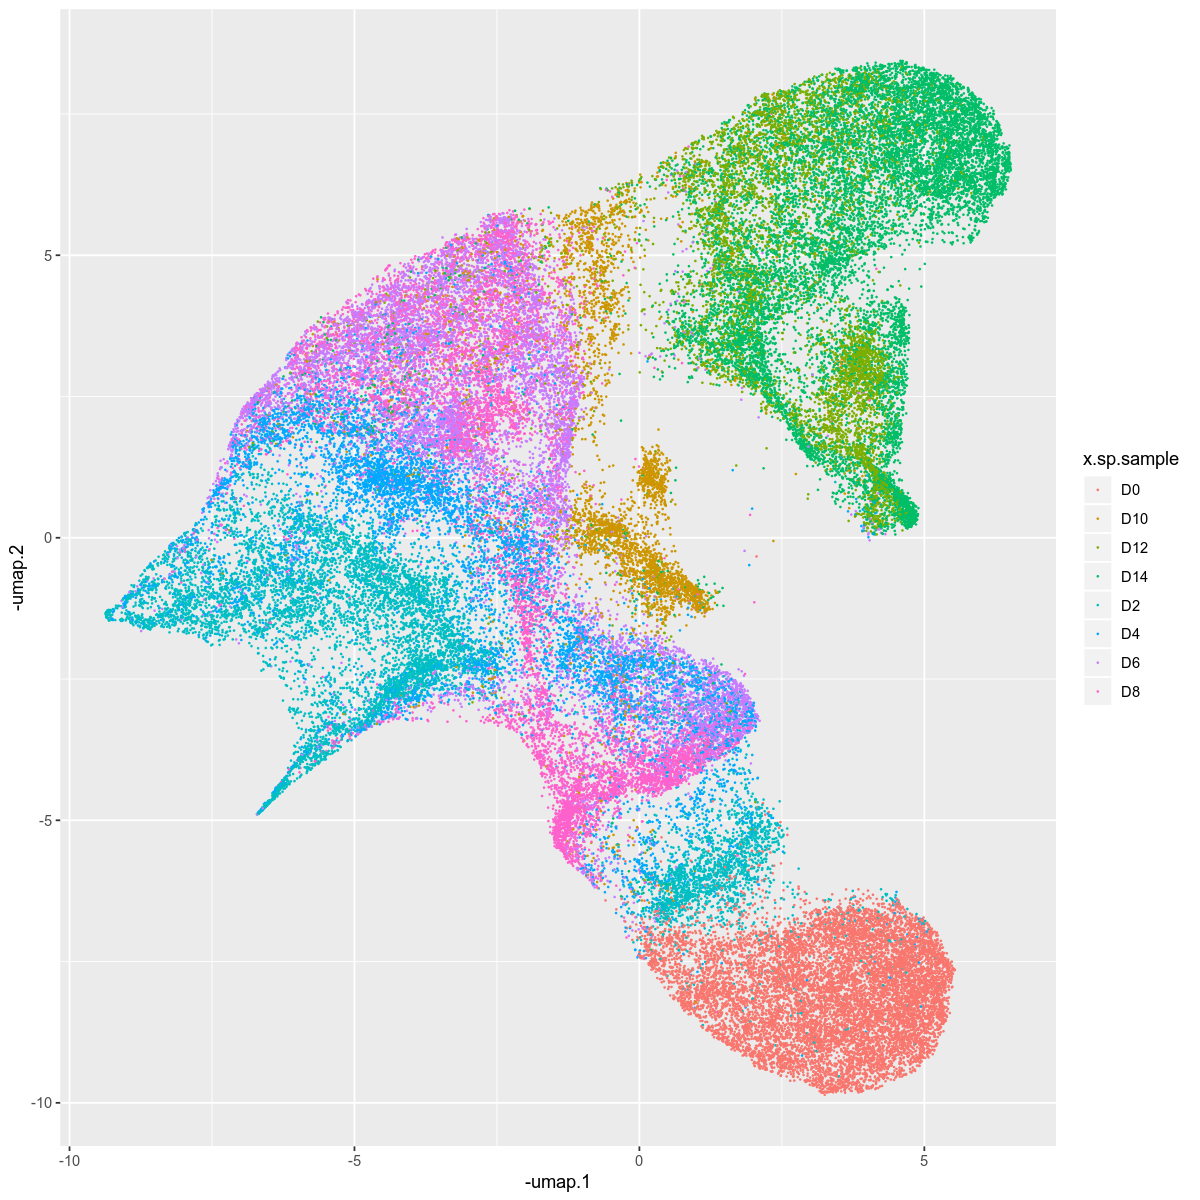

In [45]:
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(data=dat[sample(rownames(dat)),],aes(x=-umap.1,y=-umap.2,color=x.sp.sample))+
geom_point(size=0.1)

In [339]:
K = 10
nn.ranked <- nn2(
        data = dat[,5:ncol(dat)],
        k = K,
        searchtype = 'standard',
        eps = 0)

In [340]:
head(nn.ranked$nn.idx)

1,10465,6981,8571,3831,4480,941,7642,3244,5991
2,8500,51,74,10664,565,1312,8233,1561,6716
3,10491,5148,5327,4402,465,9994,2135,1295,9431
4,877,8892,7105,503,7876,6551,1376,2293,8085
5,4813,9158,148,4256,1415,997,2088,6440,3488
6,5824,1977,8191,7484,3691,10334,3256,2048,2658


In [341]:
head(nn.ranked$nn.dists)

0,0.010673142,0.013132563,0.013453399,0.013571676,0.013775209,0.013812637,0.014081683,0.014139039,0.014164188
0,0.003531819,0.003812587,0.004094480,0.004618819,0.004840739,0.004884213,0.005128630,0.005136118,0.005386535
0,0.012684808,0.012996042,0.013181340,0.013381962,0.013570758,0.013611063,0.014403853,0.014685671,0.015039947
0,0.007178368,0.007615086,0.007953468,0.008167465,0.008185777,0.008293481,0.008311797,0.008395758,0.008466042
0,0.004217409,0.005174400,0.005410933,0.005666042,0.005898960,0.006115883,0.006187560,0.006223372,0.006256851
0,0.005021202,0.005167615,0.005348971,0.005504590,0.006097673,0.006348334,0.006432384,0.006677805,0.006682252


In [342]:
j <- as.numeric(x = t(x = nn.ranked$nn.idx[,2:K]))

In [343]:
i <- ((1:length(x = j)) - 1) %/% (K-1) + 1

In [344]:
w <- as.numeric(x = t(x = nn.ranked$nn.dists[,2:K]))

In [345]:
length(i)==length(j)

[1] TRUE

In [346]:
# connect only those that are in adjacent days
day_diff = abs(match(dat[i, "x.sp.sample"], DAYS)-match(dat[j, "x.sp.sample"], DAYS))

In [347]:
sum(day_diff<2)

[1] 598204

In [348]:
edgeList = data.frame(i[day_diff<2],j[day_diff<2],1)

In [349]:
g = graph_from_edgelist(as.matrix(edgeList[,c(1,2)]), directed=FALSE);

In [350]:
E(g)$weight = w[day_diff<2]

In [351]:
sample(grep("D14", rownames(dat)), 1)

[1] 25026

In [352]:
sp = get.shortest.paths(g, 1628, 27927)

In [353]:
length(unlist(sp$vpath))

[1] 29

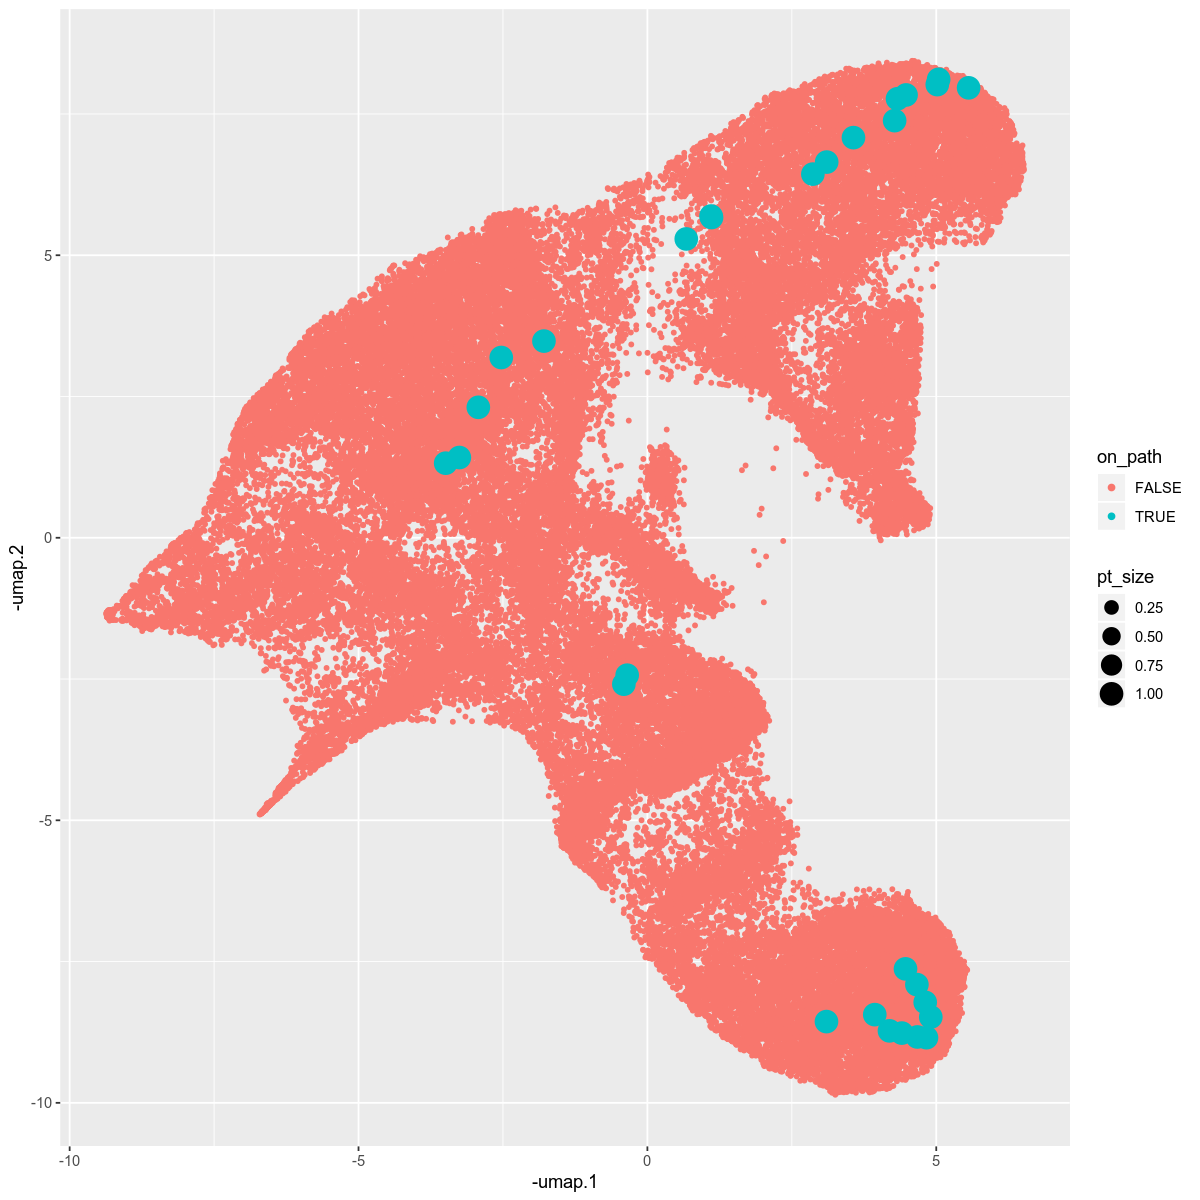

In [354]:
options(repr.plot.width = 10, repr.plot.height = 10)
df = dat
df$rowidx = seq(1,nrow(df))
df = df[sample(rownames(df)),]
df$on_path = df$rowidx %in% unlist(sp$vpath)
df$pt_size = ifelse(df$on_path, 1, 0.01)
df = df[order(df$on_path),]

ggplot(data=df,aes(x=-umap.1,y=-umap.2,color=on_path))+
geom_point(aes(size=pt_size))